In [1]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

# Datasets

In [3]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

In [4]:
padded_shapes = ([None],())

train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

In [6]:
encoder = info.features['text'].encoder

encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

# Model

In [7]:
model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, 16),
  layers.GlobalAveragePooling1D(),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training

In [9]:
history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2500/2500 [==============================] - 70s 28ms/step - loss: 0.6401 - accuracy: 0.6918 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.4681 - accuracy: 0.8326 - val_loss: 0.4352 - val_accuracy: 0.8450
Epoch 3/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3656 - accuracy: 0.8780 - val_loss: 0.3715 - val_accuracy: 0.8550
Epoch 4/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3118 - accuracy: 0.8942 - val_loss: 0.3365 - val_accuracy: 0.8800
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2758 - accuracy: 0.9064 - val_loss: 0.3114 - val_accuracy: 0.8950
Epoch 6/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2520 - accuracy: 0.9134 - val_loss: 0.2905 - val_accuracy: 0.8900
Epoch 7/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2355 - accuracy: 0.9198 - val_loss: 0.2795 - val_accu

# Evaluation

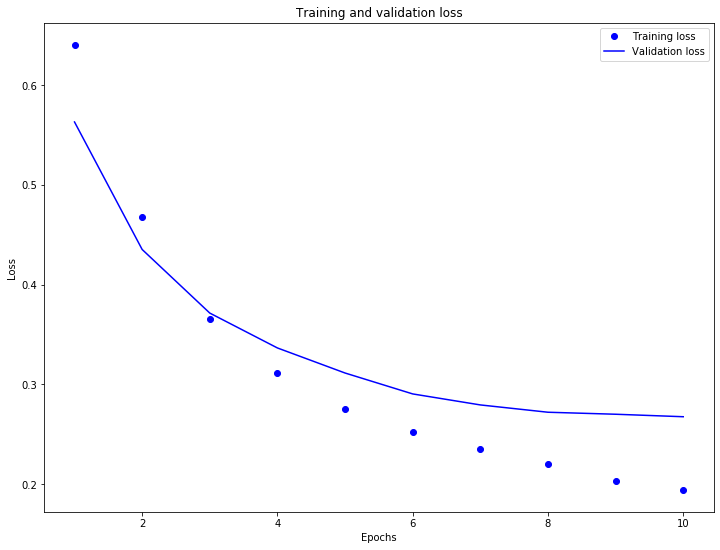

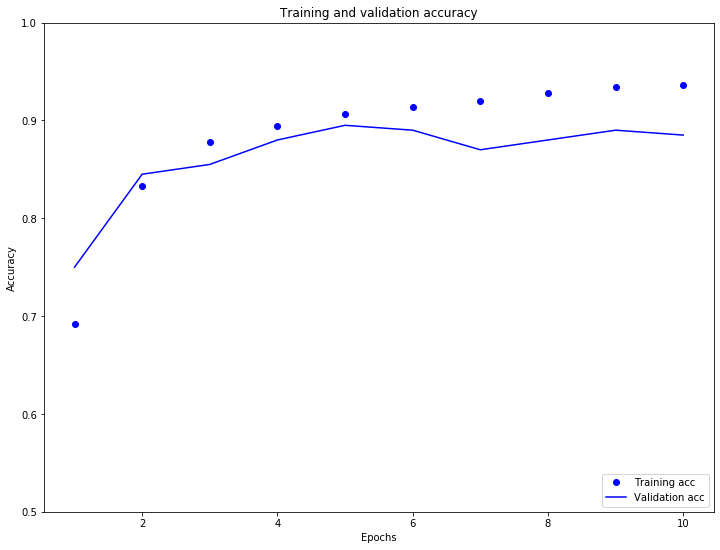

In [12]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()